# Estación Urb. Embajada (Barajas)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

import warnings
warnings.filterwarnings('ignore')

In [2]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from itertools import product

In [3]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

In [4]:
df = pd.read_csv("../data/df_55.csv", index_col=0)
df.index = pd.to_datetime(df.index)

In [5]:
df.head()

,NO2
month,
2013-01-01,47.580645
2013-02-01,36.483871
2013-03-01,31.774194
2013-04-01,28.129032
2013-05-01,26.935484


### Estacionalidad

In [6]:
df2 = df.copy()

In [7]:
df2["año"] = df.index.year
df2["mes"] = df.index.month

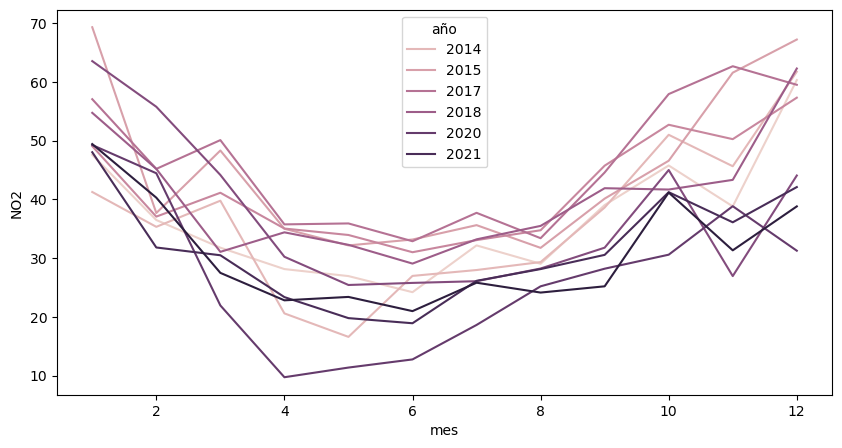

In [8]:
sns.lineplot(x = "mes", y = "NO2", hue = "año", data = df2);

### Estacionaridad

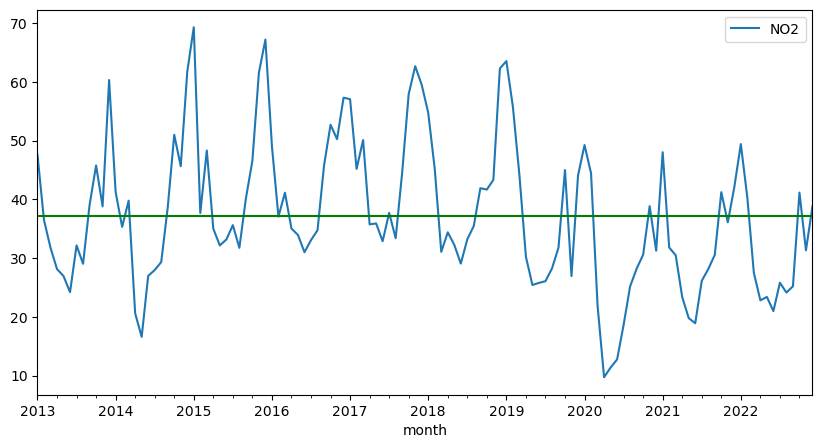

In [9]:
df.plot()
plt.axhline(df.NO2.mean(), c = "g");

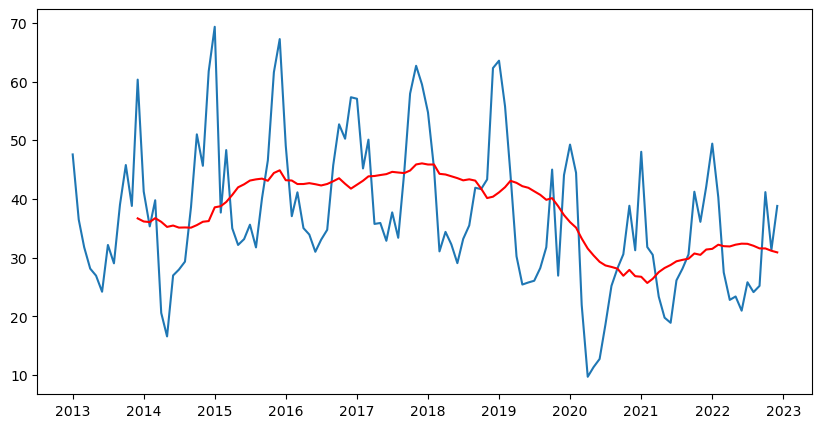

In [10]:
plt.plot(df["NO2"])
plt.plot(df.rolling(window= 12).mean(), c = "r");

In [11]:
df.head()

,NO2
month,
2013-01-01,47.580645
2013-02-01,36.483871
2013-03-01,31.774194
2013-04-01,28.129032
2013-05-01,26.935484


In [12]:
df2.head()

,NO2,año,mes
month,,,
2013-01-01,47.580645,2013,1
2013-02-01,36.483871,2013,2
2013-03-01,31.774194,2013,3
2013-04-01,28.129032,2013,4
2013-05-01,26.935484,2013,5


In [13]:
df3 = df.copy()

In [14]:
df3["year"] = df3.index.year
df3["month"] = df2.index.month
df3.head()

,NO2,year,month
month,,,
2013-01-01,47.580645,2013,1
2013-02-01,36.483871,2013,2
2013-03-01,31.774194,2013,3
2013-04-01,28.129032,2013,4
2013-05-01,26.935484,2013,5


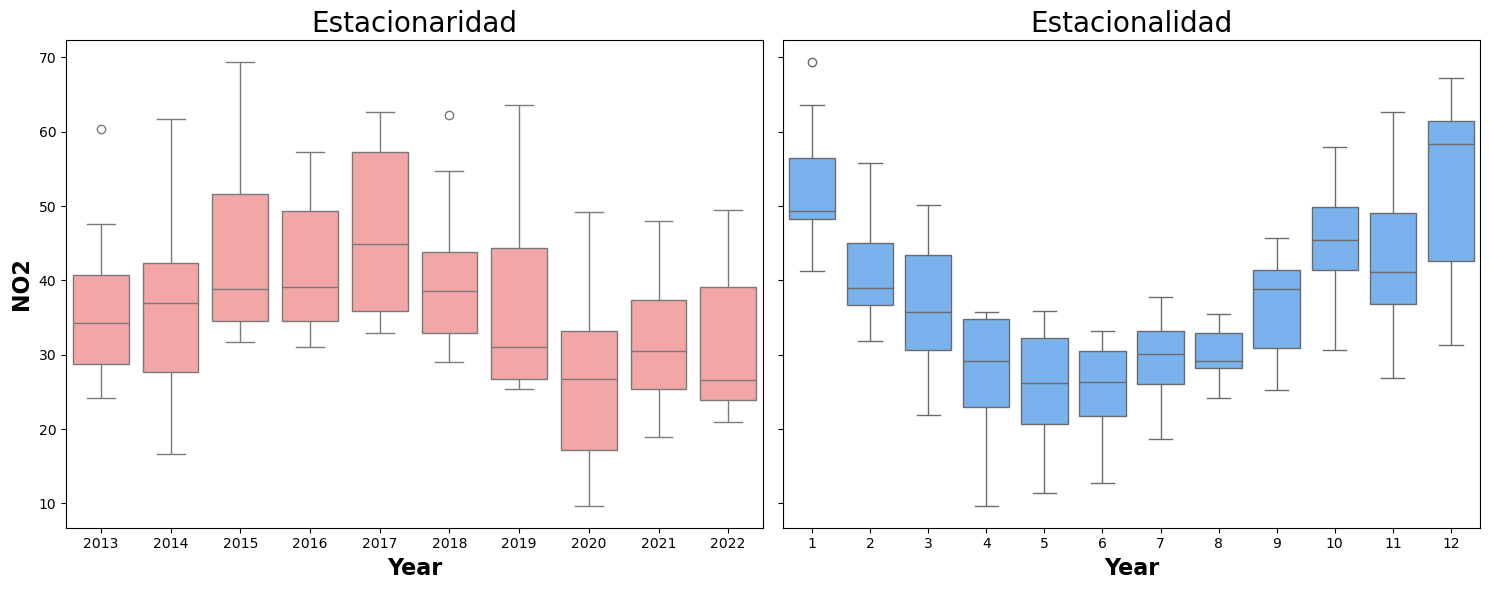

In [15]:
# Nos creamos una lista con las columnas de tiempo
tiempo = df3.columns.drop("NO2")

# Iniciamos los subplots
fig, ax = plt.subplots(nrows=1, ncols=len(tiempo), figsize=(15, 6), sharey=True)

# Nombres personalizados para los títulos
nombres = ["Estacionaridad", "Estacionalidad"]

# Colores bonitos para los boxplots
colores = ["#FF9999", "#66B2FF"]  # Puedes modificar estos códigos de colores

# Hacemos un loop para crear los boxplots para cada año
for i, col in enumerate(tiempo):
    sns.boxplot(data=df3, x=col, y="NO2", ax=ax[i], palette=[colores[i]])
    ax[i].set_title(nombres[i], fontsize=20, loc='center')
    ax[i].set_xlabel('Year', fontsize=16, fontdict=dict(weight='bold'))
    ax[i].set_ylabel('NO2', fontsize=16, fontdict=dict(weight='bold'))

plt.tight_layout()
plt.show()


No hay estacionaridad.

### Test de Fuller

In [16]:
res = adfuller(df["NO2"])
res

(-0.8854278195335729,
 0.7927333606328857,
 13,
 106,
 {'1%': -3.4936021509366793,
  '5%': -2.8892174239808703,
  '10%': -2.58153320754717},
 729.7332602504007)

In [17]:
print("AD Fuller Stats", res[0])
print("p-value", res[1])
print("Critical values")

for k, v in res[4].items():
    print(k, round(v, 2))

AD Fuller Stats -0.8854278195335729
p-value 0.7927333606328857
Critical values
1% -3.49
5% -2.89
10% -2.58


*Datos no estacionarios. Su media y su varianza están en función del tiempo 🍋*

### Autocorrelación

In [18]:
for i in range(49):
    print(f"{i} mes Lag, {df['NO2'].autocorr(lag= i)}")

0 mes Lag, 1.0
1 mes Lag, 0.7204495760160379
2 mes Lag, 0.48795598018386876
3 mes Lag, 0.22678759144870972
4 mes Lag, -0.07251582185541526
5 mes Lag, -0.2437430907977795
6 mes Lag, -0.29748477259059586
7 mes Lag, -0.27895980982721647
8 mes Lag, -0.12825417798700092
9 mes Lag, 0.1474030311020064
10 mes Lag, 0.40360054810397145
11 mes Lag, 0.6084299034254343
12 mes Lag, 0.7387708986582098
13 mes Lag, 0.642003229741784
14 mes Lag, 0.3968175198208643
15 mes Lag, 0.15557446171811887
16 mes Lag, -0.150699725769282
17 mes Lag, -0.32631435895308775
18 mes Lag, -0.39783042871519214
19 mes Lag, -0.3914052198410931
20 mes Lag, -0.2200715848158512
21 mes Lag, 0.05221303451412113
22 mes Lag, 0.27407746653269544
23 mes Lag, 0.5204780768167497
24 mes Lag, 0.6612593842454286
25 mes Lag, 0.5381942003109491
26 mes Lag, 0.3390278292528893
27 mes Lag, 0.06940291917863972
28 mes Lag, -0.23236838809077387
29 mes Lag, -0.44474475568017385
30 mes Lag, -0.5366040922696206
31 mes Lag, -0.4863919498082329
32 mes

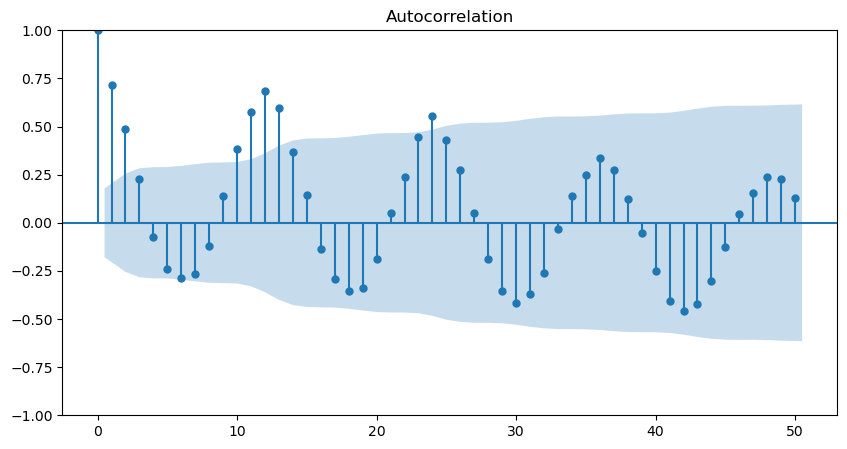

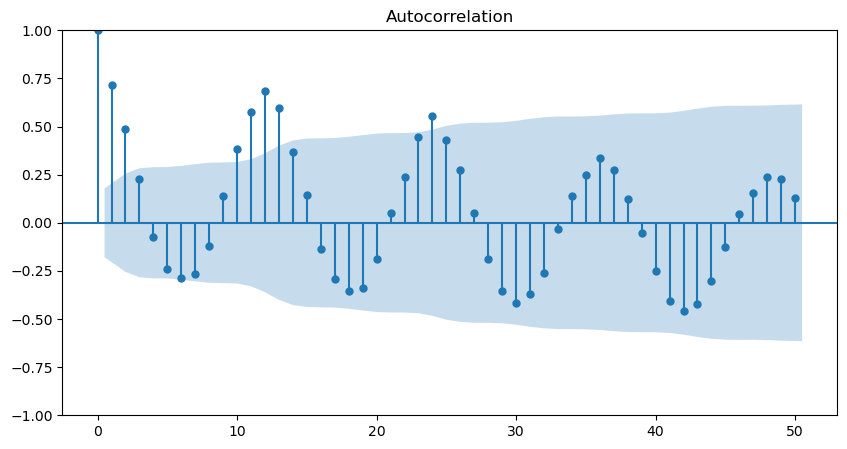

In [19]:
plot_acf(df, lags = 50)

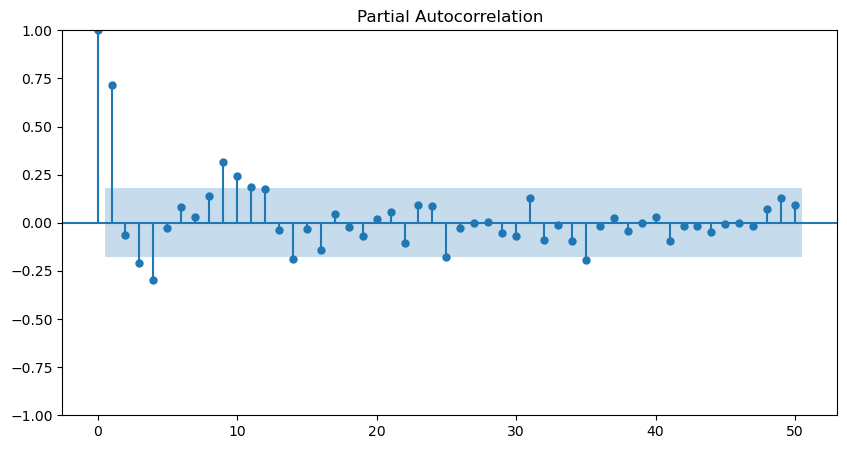

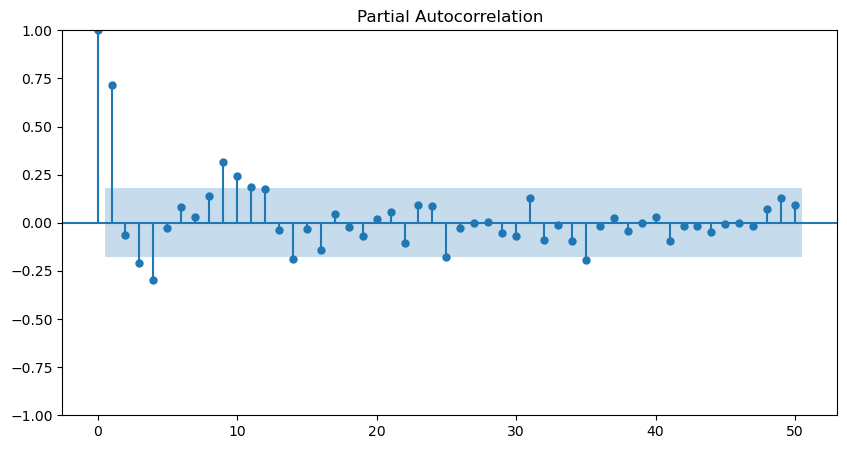

In [20]:
plot_pacf(df, lags = 50)

In [21]:
df.head()

,NO2
month,
2013-01-01,47.580645
2013-02-01,36.483871
2013-03-01,31.774194
2013-04-01,28.129032
2013-05-01,26.935484


In [22]:
df.shape

(120, 1)

In [23]:
df.isnull().sum()

NO2    0
dtype: int64

## SARIMA

In [24]:
y_test = df["NO2"][-30:]
y_train = df["NO2"][:-30]

In [25]:
ps = range(4)
ds = range(1,3)
qs = range(3)

parameters = list(product(ps,ds, qs))
print(parameters)

[(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 2, 0), (3, 2, 1), (3, 2, 2)]


In [26]:
%%time
rmse = []
order = []
for p, d, q in tqdm(parameters):
    try:
        modelo=ARIMA(y_train, order=(p, d, q)).fit()
        pred = modelo.predict(start=len(y_train), end=len(df) -1)
        error = np.sqrt(np.mean(mean_squared_error(y_test, pred)))
        rmse.append(error)
        order.append((p,d, q))
    except: 
        continue

  0%|          | 0/24 [00:00<?, ?it/s]C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_

 58%|█████▊    | 14/24 [00:00<00:00, 28.77it/s]C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\

CPU times: total: 969 ms
Wall time: 1.15 s


In [27]:
# veamos los resultados de todos los modelos
results = pd.DataFrame({"RMSE": rmse, "order": order})
results.sort_values(by="RMSE", inplace=True)
results.head()

,RMSE,order
7,10.362779,"(1, 1, 1)"
8,10.564764,"(1, 1, 2)"
3,14.416016,"(0, 2, 0)"
9,15.411222,"(1, 2, 0)"
20,16.762656,"(3, 1, 2)"


In [28]:
%%time

modelo=SARIMAX(endog=y_train, 
               exog=None,
               #order=(4, 1, 5),  # modelo arima
               seasonal_order=(1, 1, 1, 12) # modelo sarima, estacionalidad es el ultimo
              ).fit(disp=False)
                     
pred=modelo.predict(len(y_train), len(df)-1)  

error=(pred-y_test).abs().sum()/len(pred) 
print ('Error mae: ', error)


res=pd.DataFrame({'real':y_test, 'pred':pred, 'error':pred-y_test})
res

Error mae:  5.417162795052235
CPU times: total: 62.5 ms
Wall time: 81.3 ms


C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,real,pred,error
2020-07-01,18.612903,21.609320,2.996417
2020-08-01,25.193548,27.228217,2.034668
2020-09-01,28.193548,34.677141,6.483593
2020-10-01,30.580645,42.334374,11.753729
2020-11-01,38.838710,35.898202,-2.940507
2020-12-01,31.258065,53.415977,22.157912
2021-01-01,48.032258,56.397141,8.364883
2021-02-01,31.806452,49.993580,18.187128
2021-03-01,30.483871,33.495036,3.011165
2021-04-01,23.354839,21.122630,-2.232209


In [29]:
pred["real_test"] = y_test

In [30]:
pred_año = pd.DataFrame(modelo.predict(start = len(df), end = len(df) + 12))
pred_año

,predicted_mean
2023-01-01,54.636057
2023-02-01,48.623676
2023-03-01,30.625897
2023-04-01,18.288033
2023-05-01,17.390486
2023-06-01,18.234993
2023-07-01,23.707813
2023-08-01,27.888914
2023-09-01,33.847644
2023-10-01,43.362847


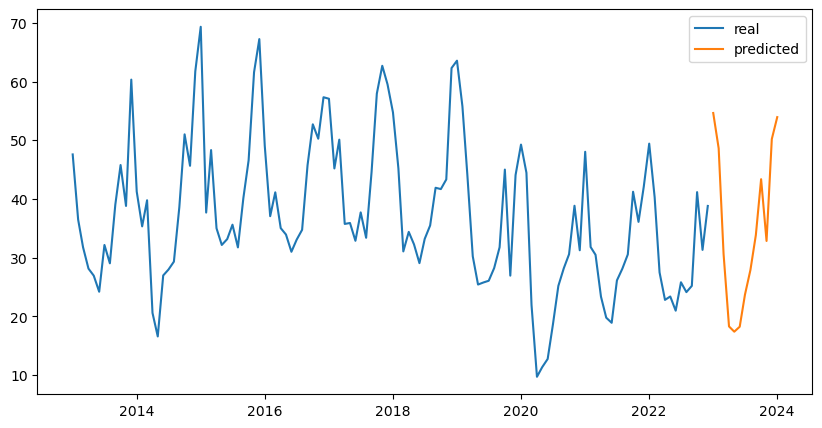

In [31]:
plt.plot(df)
plt.plot(pred_año)
plt.legend(["real", "predicted"]);

In [32]:
pred_año.mean()

predicted_mean    34.891077
dtype: float64

In [34]:
df

,NO2
month,
2013-01-01,47.580645
2013-02-01,36.483871
2013-03-01,31.774194
2013-04-01,28.129032
2013-05-01,26.935484
...,...
2022-08-01,24.129032
2022-09-01,25.193548
2022-10-01,41.161290


In [38]:
#Corrección primer valor de la predicción

# Obtener el valor de la fila '2023-01-01' y columna 'predicted_mean' en pred_año
valor_pred_año = pred_año.loc['2023-01-01', 'predicted_mean']

# Obtener el valor de la fila '2023-10-01' y columna 'NO2' en df
valor_df = df.loc['2022-12-01', 'NO2']

# Calcular la media entre los dos valores
media = (valor_pred_año + valor_df) / 2

# Sustituir el valor calculado en pred_año
pred_año.loc['2023-11-01', 'predicted_mean'] = media

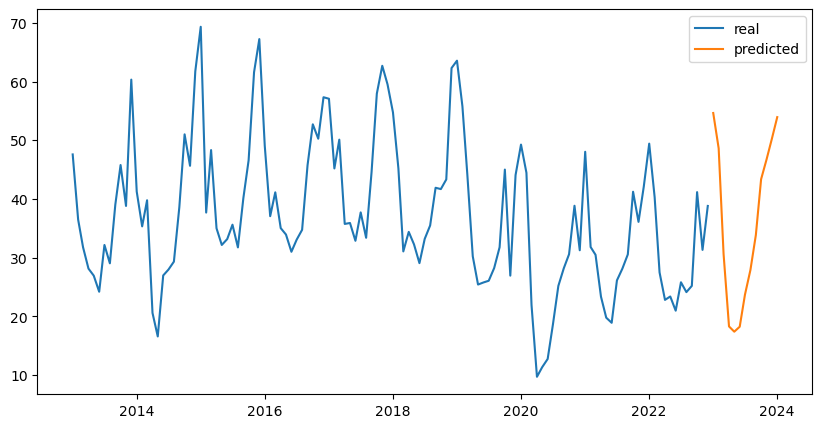

In [39]:
plt.plot(df)
plt.plot(pred_año)
plt.legend(["real", "predicted"]);

In [37]:
pred_año.mean()

predicted_mean    34.891077
dtype: float64